In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
# uploaded = files.upload()

df = pd.read_excel("ispu2021-2023edited3.xlsx", header=0)

In [ ]:
df.dtypes

tanggal     object
pm10        object
pm25        object
so2         object
co          object
o3          object
no2         object
categori    object
dtype: object

In [ ]:
df.describe()

,tanggal,pm10,pm25,so2,co,o3,no2,categori
count,4015,4015,3953,4015,4015,4015,4015,4014
unique,1065,92,151,76,51,113,62,5
top,2022-12-01,-,-,51,10,24,15,SEDANG
freq,6,222,295,207,349,150,187,2932


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4015 entries, 0 to 4014
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tanggal   4015 non-null   object
 1   pm10      4015 non-null   object
 2   pm25      3953 non-null   object
 3   so2       4015 non-null   object
 4   co        4015 non-null   object
 5   o3        4015 non-null   object
 6   no2       4015 non-null   object
 7   categori  4014 non-null   object
dtypes: object(8)
memory usage: 251.1+ KB


In [ ]:
# drop atribut yang tidak diperlukan
df = df.drop('tanggal', axis=1)

df.head()

,pm10,pm25,so2,co,o3,no2,categori
0,45,NaN,21,13,40,15,BAIK
1,80,NaN,22,44,44,22,SEDANG
2,27,NaN,14,9,29,---,BAIK
3,55,NaN,19,29,67,13,SEDANG
4,57,NaN,21,23,36,16,SEDANG


In [ ]:
df = df[df['categori'] != 'TIDAK ADA DATA']
df.shape

(3978, 7)

In [ ]:
df = df[df['categori'] != 'SANGAT TIDAK SEHAT']
df.shape

(3975, 7)

In [ ]:
df.isnull().sum()

pm10         0
pm25        60
so2          0
co           0
o3           0
no2          0
categori     1
dtype: int64

In [ ]:
df = df.dropna()
df.shape

(3914, 7)

In [ ]:
df.replace('---', 0, inplace=True)
df.replace('-', 0, inplace=True)

categori_col = df['categori']
df = df.drop(columns=['categori']).astype(int)
df['categori'] = categori_col

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3914 entries, 10 to 4014
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pm10      3914 non-null   int64 
 1   pm25      3914 non-null   int64 
 2   so2       3914 non-null   int64 
 3   co        3914 non-null   int64 
 4   o3        3914 non-null   int64 
 5   no2       3914 non-null   int64 
 6   categori  3914 non-null   object
dtypes: int64(6), object(1)
memory usage: 244.6+ KB


<ipython-input-202-2159592da159>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('---', 0, inplace=True)
<ipython-input-202-2159592da159>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('-', 0, inplace=True)


In [ ]:
df_check = df.copy()
df_check['categori'] = df['categori'].replace({'BAIK': 0, 'SEDANG': 1, 'TIDAK SEHAT': 2})

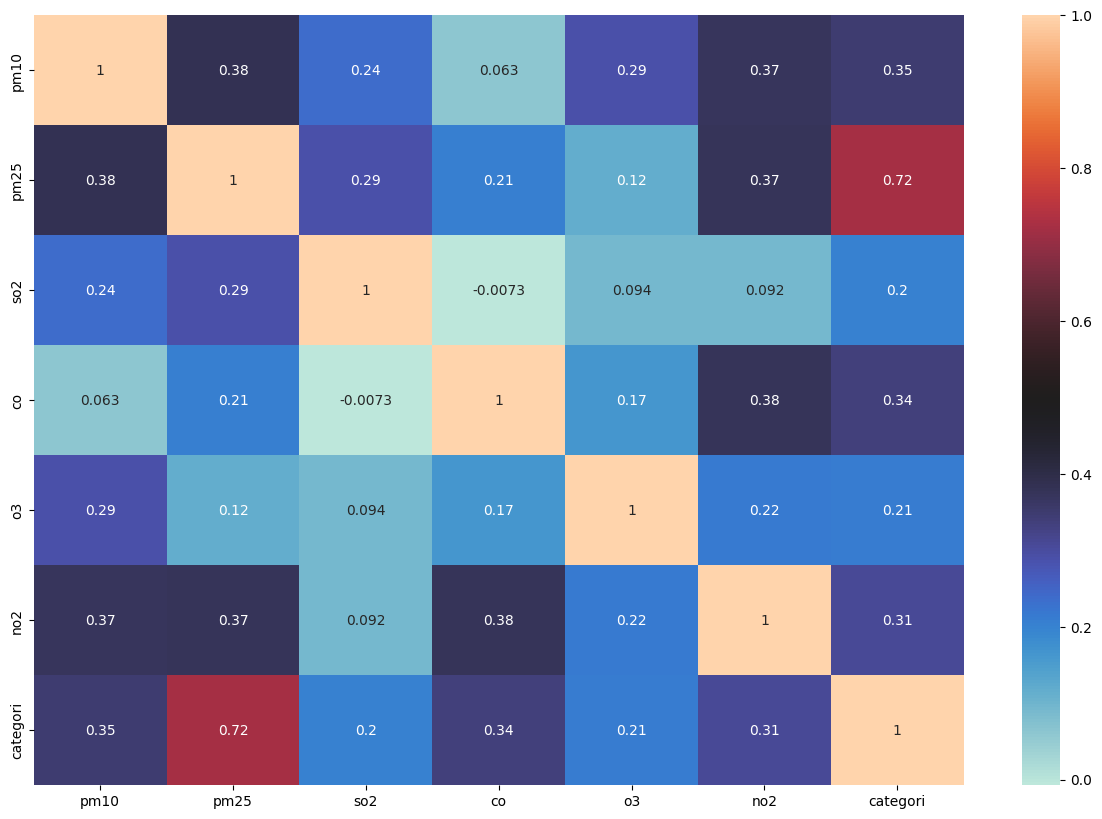

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (15,10))
sns.heatmap(df_check.corr(), annot=True, cmap='icefire')
plt.show()

In [ ]:
df.shape

(3914, 7)

In [ ]:
X = df.drop(columns=['categori'])
y = df['categori']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

In [ ]:
print(f"Training set size: {X_train.shape}, {y_train.shape}")
print(f"Validation set size: {X_val.shape}, {y_val.shape}")
print(f"Testing set size: {X_test.shape}, {y_test.shape}")

Training set size: (2348, 6), (2348,)
Validation set size: (587, 6), (587,)
Testing set size: (979, 6), (979,)


SVM (CLASSIFIER)

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# TRAIN
svc=SVC()
svc.fit(X_train,y_train)

# VALIDASI
val_svm_pred=svc.predict(X_val)

confusionMatrixValidation=confusion_matrix(y_val,val_svm_pred)
print("VALIDATION")
print("confussion matrix: ")
print(confusionMatrixValidation)
print("\n")

accuracyValidation=accuracy_score(y_val,val_svm_pred)
print("accuracy",accuracyValidation*100)

VALIDATION
confussion matrix: 
[[ 38  16   0]
 [ 12 421   1]
 [  0   5  94]]


accuracy 94.20783645655877


In [ ]:
# TEST
test_svm_pred=svc.predict(X_test)

confusionMatrixTest=confusion_matrix(y_test,test_svm_pred)
print("TEST")
print("confussion matrix: ")
print(confusionMatrixTest)
print("\n")

accuracyTest=accuracy_score(y_test,test_svm_pred)
print("accuracy",accuracyTest*100)

TEST
confussion matrix: 
[[ 82  21   0]
 [  6 728   5]
 [  0   7 130]]


accuracy 96.01634320735445


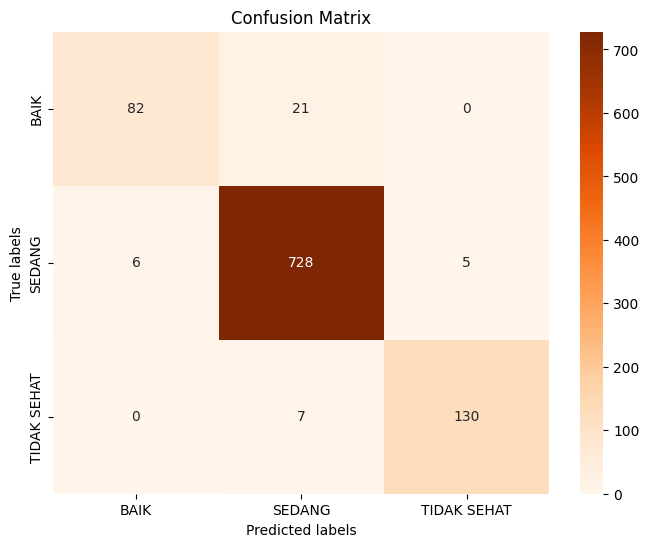

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusionMatrixTest, annot=True, cmap='Oranges', fmt='g',
            xticklabels=svc.classes_, yticklabels=svc.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

RANDOM FOREST (CLASSIFIER)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# TRAIN
rf = RandomForestClassifier(n_estimators=13, random_state=42)
rf.fit(X_train, y_train)

# VALIDASI
val_rf_pred=rf.predict(X_val)

val_rf_conf_matrix = confusion_matrix(y_val, val_rf_pred)
val_rf_accuracy = accuracy_score(y_val, val_rf_pred)

print("VALIDATION")
print("confussion matrix")
print(val_rf_conf_matrix)
print("\n")
print("accuracy",val_rf_accuracy*100)

VALIDATION
confussion matrix
[[ 51   3   0]
 [  2 432   0]
 [  0   1  98]]


accuracy 98.9778534923339


In [ ]:
# TEST
test_rf_pred=rf.predict(X_test)

test_rf_conf_matrix = confusion_matrix(y_test, test_rf_pred)
test_rf_accuracy = accuracy_score(y_test, test_rf_pred)

print("TEST")
print("confussion matrix")
print(test_rf_conf_matrix)
print("\n")
print("accuracy",test_rf_accuracy*100)

TEST
confussion matrix
[[ 96   7   0]
 [  2 737   0]
 [  0   3 134]]


accuracy 98.77425944841676


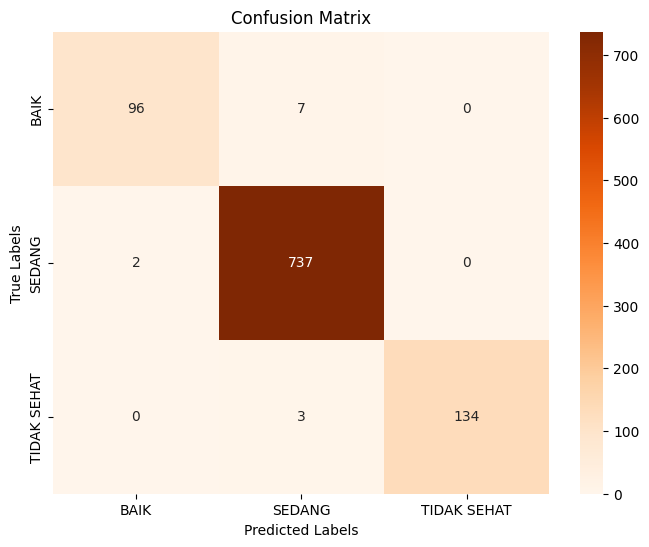

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(test_rf_conf_matrix, annot=True, fmt='d', cmap='Oranges',
            xticklabels=svc.classes_, yticklabels=svc.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()